# EXcercise Chapter 8

9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? 

---

10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using different colors to rep‐resent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sam‐ple or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')
X = X.to_numpy()
y = y.to_numpy()
y = y.ravel()

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

*Exercise: Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.*

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA 
import time

In [4]:
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [5]:
t_0 = time.time()
rnd_clf.fit(X_train, y_train)
t_1 = time.time()
t_d = round((t_1 - t_0),2)
print(f"RandomForest training took {t_d} s.")

RandomForest training took 45.46 s.


In [6]:
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

- Now use PCA with 95% explained variance
- Then Train a new Random Forest classifier on the reduced dataset and see how long it takes. 
    - Was training much faster?

In [7]:
pca = PCA(n_components=0.95)
X_train_reduced =pca.fit_transform(X_train)

In [8]:
rnd_clf_2 = RandomForestClassifier(n_estimators =100,random_state =42)

In [9]:
t_0 = time.time() # Run Forest! Run!
rnd_clf_2.fit(X_train_reduced, y_train)
t_1 = time.time()
t_d = round((t_1 - t_0),2)
print(f"With the reduced dataset,RandomForest training took {t_d} s.")

With the reduced dataset,RandomForest training took 124.25 s.


In [10]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf_2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

- Dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. See figure 8-6 (the `manifold_decision_boundary_plot*` plots above). If you try a softmax classifier instead of a random forest classifier, you will find that training time is reduced by a factor of 3 when using PCA

---

- It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance. :(

Let's see if it helps when using softmax regression:

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_clf = LogisticRegression(multi_class="multinomial",
                             solver='lbfgs',
                             random_state=42)


In [13]:
t_0 = time.time()
log_clf.fit(X_train, y_train)
t_1 = time.time()
t_d = round((t_1 - t_0), 2)
print(f"Logistic Regression training took {t_d} s.")

Logistic Regression training took 34.02 s.


/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

Okay, so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [15]:
log_clf_2 = LogisticRegression(multi_class='multinomial',
                               solver='lbfgs',
                               random_state=42)

In [16]:
t_0 = time.time()
log_clf_2.fit(X_train_reduced,y_train)
t_1 = time.time()
t_d = round((t_1 - t_0),2)
print(f"Tranning took {t_d}s")

Tranning took 13.42s


/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Exercise: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.*


In [17]:
X = pd.read_feather("../data/mnist_784_X.feather")
y = pd.read_feather("../data/mnist_784_y.feather")
X = X.to_numpy()
y = y.to_numpy().ravel()

In [18]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m] # random permutation
X = X[idx]
y = y[idx]

Use t-SNE to reduce the dimension down to 2D and so we can plot the dataset

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components =2,random_state=42)
X_reduced = tsne.fit_transform(X)

/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


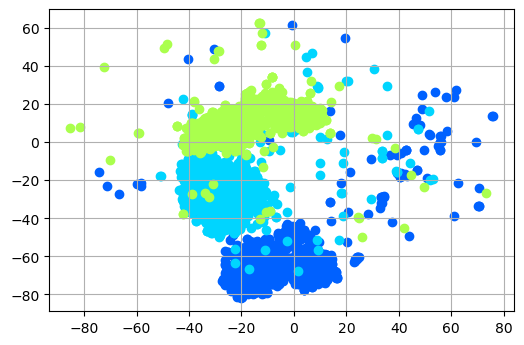

In [21]:
cmap = mpl.cm.get_cmap("jet")

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for digit in (2, 3, 5):  # trt more combinations here
    ax.scatter(X_reduced[y == digit, 0],
               X_reduced[y == digit, 1],
               c=[cmap(digit / 9)])
# ax.axis('off')
plt.grid(1)
plt.show()

In [22]:
# cmap = mpl.cm.get_cmap("jet")

# for digit in (2, 3, 5):
#     print(cmap(digit / 9))

In [23]:
idx = (y ==2 )|(y==3)|(y==5)
y[idx]

array([3, 3, 5, ..., 2, 3, 5], dtype=int8)

Let's see if we can produce a nicer image by running t-SNE on these 3 digits:

In [24]:
idx = (y == 2) & (y == 3) & (y == 5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2,
                   random_state=42,
                   init='pca',
                   learning_rate='auto')
X_subset_reduced = tsne_subset.fit_transform(X_subset)

ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 2 is required.

NameError: name 'X_subset_reduced' is not defined

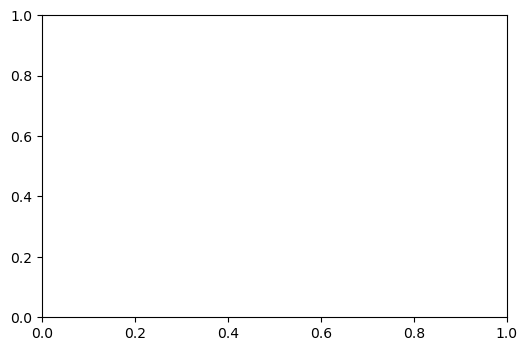

In [ ]:
# cmap = mpl.cm.get_cmap("jet")

_, ax = plt.subplots(figsize=(6,4),dpi=100)

for digit in (2,3,5):
    ax.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1],c=[cmap(digit/9)])
ax.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now. 

- *Exercise: Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.*

- Let's create a `plot_digits()` function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples ([plot_lle_digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html), based on a different digit dataset). 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0],
                    X_normalized[y == digit, 1],
                    c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord,
                                          axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0],
                         image_coord[1],
                         str(int(y[index])),
                         color=cmap(y[index] / 9),
                         fontdict={
                             "weight": "bold",
                             "size": 16
                         })
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

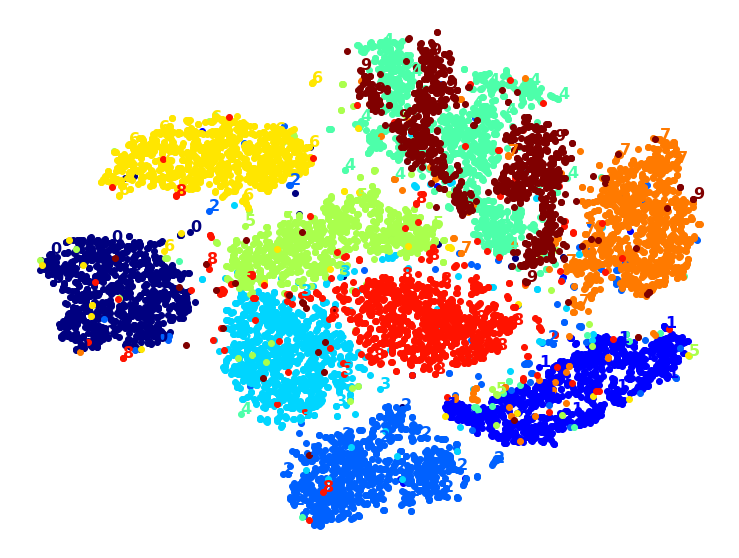

In [ ]:
plot_digits(X_reduced, y)

In [ ]:
plot_digits(X_subset_reduced,y,images=X,figsize=(35,25))

NameError: name 'X_subset_reduced' is not defined